Ultralytics 8.3.201 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=VOC.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       4952      12032      0.757      0.699      0.767      0.545
             aeroplane        204        285      0.915      0.645      0.826      0.579
               bicycle        239        337      0.831      0.712      0.829      0.577
                  bird        282        459       0.78      0.634      0.741      0.503
                  boat        172        263      0.596       0.62      0.609      0.366
                bottle        212        469      0.536      0.753      0.711      0.476
                   bus        174        213      0.879      0.784      0.888      0.732
                   car        721       1201      0.835      0.832      0.903      0.702
                   cat        322        358      0.752      0.793      0.825      0.609
                 chair        417        756      0.671      0.545      0.625      0.409
                   cow        127        244      0.713      0.721       0.76       0.55
           diningtabl

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       4952      12032      0.756      0.699      0.767      0.545
             aeroplane        204        285      0.911      0.648      0.827      0.578
               bicycle        239        337       0.83      0.712      0.828      0.577
                  bird        282        459      0.778      0.634       0.74      0.502
                  boat        172        263      0.587       0.62       0.61      0.368
                bottle        212        469      0.535      0.753      0.708      0.477
                   bus        174        213      0.878      0.778      0.886      0.732
                   car        721       1201      0.834      0.833      0.903      0.702
                   cat        322        358      0.754      0.795      0.825      0.608
                 chair        417        756      0.673      0.545      0.624      0.408
                   cow        127        244       0.71      0.723      0.759      0.551
           diningtabl

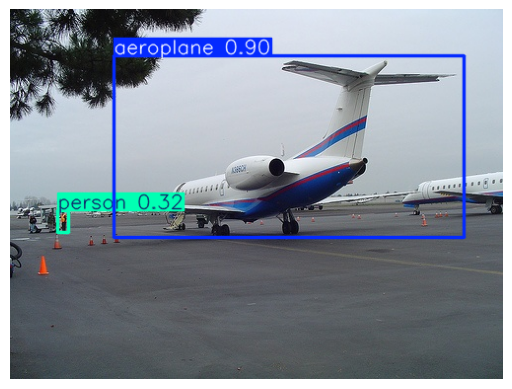

In [4]:
# ==============================
# YOLOv8 Object Detection on Pascal VOC (Kaggle Pipeline - Correct Path)
# ==============================

# Install dependencies
!pip install ultralytics opencv-python --quiet

# Import libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2, os, random

# Step 1: Load pre-trained YOLO model
model = YOLO("yolov8n.pt")   # Nano model for speed

# Step 2: Train on Pascal VOC (demo - short run)
# You need a proper data YAML for full training, but this is just to show pipeline
model.train(
    data="VOC.yaml",   # assumes VOC.yaml available in ultralytics
    epochs=3,
    imgsz=640,
    batch=16
)

# Step 3: Validate model
metrics = model.val()
print("Validation Results:", metrics)

# Step 4: Correct Kaggle dataset path
img_dir = "/kaggle/input/pascal-voc-2007/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages"

# Pick a random image
sample_img = random.choice(os.listdir(img_dir))
img_path = os.path.join(img_dir, sample_img)
print("Testing on:", img_path)

# Step 5: Run inference
results = model.predict(img_path, conf=0.25)

# Step 6: Visualize detection
res_img = results[0].plot()
plt.imshow(cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
